In [1]:
# Common imports
import numpy as np
import pandas as pd
np.random.seed(42)

In [2]:
flippers = pd.read_csv("INPUTS_1000.csv")
flippers.head()

,EFF_AGE,ACT_AGE,LND_SQFOOT,TOT_LVG_AREA,S_LEGAL,CONST_CLASS,IMP_QUAL,JV,LND_VAL,NO_BULDNG,NCONST_VAL,DEL_VAL,SPEC_FEAT_VAL,MonthDifference,SALE_PRC1,Target_Var
0,23,23,20850,1453,LOTS 13 TO 18 INC BLK L 4TH AD,0,3,154349,13755,1,0,0,13661,5,205000,0
1,18,22,10000,1330,LOT 8 BLK 266 DELTONA LAKES UN,0,3,149271,20400,1,0,0,278,3,210000,0
2,7,30,10000,1395,LOT 9 BLK 322 DELTONA LAKES UN,0,3,169016,21200,1,0,0,0,5,199900,0
3,12,20,10000,1551,LOT 9 BLK 370 DELTONA LAKES UN,0,3,167252,21200,1,0,0,142,4,186000,0
4,42,42,10250,1702,LOT 7 BLK 366 DELTONA LAKES UN,0,3,130450,24600,1,0,0,897,4,219900,0


In [3]:
flippers.shape

(1000, 16)

In [4]:
# Sampling 30% of the data set due to the hardware limitations to derive Feature Importance
# when 100% of the data set processed, system asked for 200 GB of Ram
# Accuracy and Confusion Matrix reported on the final report were derived from 100% of origianl data set
flippers = flippers.sample(frac=0.30)

In [5]:
flippers.shape

(300, 16)

In [6]:
flippers.dtypes

EFF_AGE             int64
ACT_AGE             int64
LND_SQFOOT          int64
TOT_LVG_AREA        int64
S_LEGAL            object
CONST_CLASS         int64
IMP_QUAL            int64
JV                  int64
LND_VAL             int64
NO_BULDNG           int64
NCONST_VAL          int64
DEL_VAL             int64
SPEC_FEAT_VAL       int64
MonthDifference     int64
SALE_PRC1           int64
Target_Var          int64
dtype: object

## Splitting the data into train and test sets

In [7]:
#Splitting Data
from sklearn.model_selection import train_test_split
train, test = train_test_split(flippers, test_size=0.3)

In [8]:
#Checking for missing values
train.isna().sum()

EFF_AGE            0
ACT_AGE            0
LND_SQFOOT         0
TOT_LVG_AREA       0
S_LEGAL            0
CONST_CLASS        0
IMP_QUAL           0
JV                 0
LND_VAL            0
NO_BULDNG          0
NCONST_VAL         0
DEL_VAL            0
SPEC_FEAT_VAL      0
MonthDifference    0
SALE_PRC1          0
Target_Var         0
dtype: int64

In [9]:
train.isnull()

,EFF_AGE,ACT_AGE,LND_SQFOOT,TOT_LVG_AREA,S_LEGAL,CONST_CLASS,IMP_QUAL,JV,LND_VAL,NO_BULDNG,NCONST_VAL,DEL_VAL,SPEC_FEAT_VAL,MonthDifference,SALE_PRC1,Target_Var
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
314,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
636,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [11]:
#Separating Target Variable
train_y = train[['Target_Var']]
test_y = test[['Target_Var']]

#Removing Target, Profit_Loss and SALE_PRC2 from the Data Set
train_x = train.drop(['Target_Var'], axis =1)
test_x = test.drop(['Target_Var'], axis =1)   

In [12]:
train_x.shape

(210, 15)

In [13]:
#Transforming Data Types for Numeric Columns which are categorical in nature:
#Int
flippers[['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
        'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference'
        ,'SALE_PRC1']]=flippers[['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
        'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference','SALE_PRC1']].astype(int)

#Str
flippers[['S_LEGAL','IMP_QUAL','CONST_CLASS']]=flippers[['S_LEGAL','IMP_QUAL'
,'CONST_CLASS']].astype(str)


In [14]:
numeric_columns = ['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
                  'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference','SALE_PRC1']

categorical_columns = ['S_LEGAL','IMP_QUAL','CONST_CLASS']

In [15]:
numeric_columns

['EFF_AGE',
 'ACT_AGE',
 'LND_SQFOOT',
 'TOT_LVG_AREA',
 'JV',
 'LND_VAL',
 'NO_BULDNG',
 'NCONST_VAL',
 'DEL_VAL',
 'SPEC_FEAT_VAL',
 'MonthDifference',
 'SALE_PRC1']

In [16]:
categorical_columns

['S_LEGAL', 'IMP_QUAL', 'CONST_CLASS']

In [17]:
train.isna().sum()

EFF_AGE            0
ACT_AGE            0
LND_SQFOOT         0
TOT_LVG_AREA       0
S_LEGAL            0
CONST_CLASS        0
IMP_QUAL           0
JV                 0
LND_VAL            0
NO_BULDNG          0
NCONST_VAL         0
DEL_VAL            0
SPEC_FEAT_VAL      0
MonthDifference    0
SALE_PRC1          0
Target_Var         0
dtype: int64

In [18]:
# Numeric Transformer
numeric_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [19]:
#Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
#Preprocessor
preprocessor = ColumnTransformer([
    ('num',numeric_transformer,numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
  
])

In [21]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_x)

train_x

<210x219 sparse matrix of type '<class 'numpy.float64'>'
	with 3150 stored elements in Compressed Sparse Row format>

In [22]:
#Fit and transform the test data
test_x = preprocessor.transform(test_x)

test_x

<90x219 sparse matrix of type '<class 'numpy.float64'>'
	with 1275 stored elements in Compressed Sparse Row format>

In [23]:
type(train_x), type(test_x)

(scipy.sparse._csr.csr_matrix, scipy.sparse._csr.csr_matrix)

In [24]:
train_x.shape, test_x.shape

((210, 219), (90, 219))

In [25]:
#Retrieving the column names:
preprocessor.get_feature_names_out()

array(['num__EFF_AGE', 'num__ACT_AGE', 'num__LND_SQFOOT',
       'num__TOT_LVG_AREA', 'num__JV', 'num__LND_VAL', 'num__NO_BULDNG',
       'num__NCONST_VAL', 'num__DEL_VAL', 'num__SPEC_FEAT_VAL',
       'num__MonthDifference', 'num__SALE_PRC1',
       'cat__S_LEGAL_10-15 52 42', 'cat__S_LEGAL_18-13    05-3S-26E',
       'cat__S_LEGAL_19-50    01-3S-26E  .186',
       'cat__S_LEGAL_2-24     56-2S-26E',
       'cat__S_LEGAL_3-79     59-2S-26E  .78',
       'cat__S_LEGAL_30-64    13-2S-25E',
       'cat__S_LEGAL_31-75    14-3S-25E',
       'cat__S_LEGAL_33 5 13 ORB 1161 P 905', 'cat__S_LEGAL_33-48-42',
       'cat__S_LEGAL_34 6S 22', 'cat__S_LEGAL_56-76    23-1N-27E  .42',
       'cat__S_LEGAL_61-107   35-1N-27E  .20',
       'cat__S_LEGAL_ALBERT PARK ADD PB 3 PG 25 BLK',
       'cat__S_LEGAL_ALOMA ESTATES 12/28 LOT 52',
       'cat__S_LEGAL_ARLINGTON HEIGHTS',
       'cat__S_LEGAL_BARNA PLACE E 56.49 FT OF LOT',
       'cat__S_LEGAL_BARRINGTON ESTATES PHASE 1 SUB',
       'cat__S_LEGAL_BA

In [26]:
# Check if your scikit-learn version is below 1.1.1

import sklearn

sklearn.__version__

'1.1.2'

In [27]:
# Now we can retrieve the column names:

preprocessor.get_feature_names_out()

array(['num__EFF_AGE', 'num__ACT_AGE', 'num__LND_SQFOOT',
       'num__TOT_LVG_AREA', 'num__JV', 'num__LND_VAL', 'num__NO_BULDNG',
       'num__NCONST_VAL', 'num__DEL_VAL', 'num__SPEC_FEAT_VAL',
       'num__MonthDifference', 'num__SALE_PRC1',
       'cat__S_LEGAL_10-15 52 42', 'cat__S_LEGAL_18-13    05-3S-26E',
       'cat__S_LEGAL_19-50    01-3S-26E  .186',
       'cat__S_LEGAL_2-24     56-2S-26E',
       'cat__S_LEGAL_3-79     59-2S-26E  .78',
       'cat__S_LEGAL_30-64    13-2S-25E',
       'cat__S_LEGAL_31-75    14-3S-25E',
       'cat__S_LEGAL_33 5 13 ORB 1161 P 905', 'cat__S_LEGAL_33-48-42',
       'cat__S_LEGAL_34 6S 22', 'cat__S_LEGAL_56-76    23-1N-27E  .42',
       'cat__S_LEGAL_61-107   35-1N-27E  .20',
       'cat__S_LEGAL_ALBERT PARK ADD PB 3 PG 25 BLK',
       'cat__S_LEGAL_ALOMA ESTATES 12/28 LOT 52',
       'cat__S_LEGAL_ARLINGTON HEIGHTS',
       'cat__S_LEGAL_BARNA PLACE E 56.49 FT OF LOT',
       'cat__S_LEGAL_BARRINGTON ESTATES PHASE 1 SUB',
       'cat__S_LEGAL_BA

In [28]:
from scipy.sparse import csr_matrix

In [29]:
train_x1 = pd.DataFrame.sparse.from_spmatrix(train_x)
test_x1 = pd.DataFrame.sparse.from_spmatrix(test_x)

In [30]:
type(train_x1), type(test_x1)


(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [31]:
train_x1.shape, test_x1.shape

((210, 219), (90, 219))

In [32]:
#If you wanted, you can recreate the data set in the processed format:

flippers_train_processed = pd.DataFrame(train_x1, columns=preprocessor.get_feature_names_out())

flippers_train_processed

,num__EFF_AGE,num__ACT_AGE,num__LND_SQFOOT,num__TOT_LVG_AREA,num__JV,num__LND_VAL,num__NO_BULDNG,num__NCONST_VAL,num__DEL_VAL,num__SPEC_FEAT_VAL,...,cat__IMP_QUAL_3,cat__IMP_QUAL_4,cat__IMP_QUAL_5,cat__IMP_QUAL_6,cat__CONST_CLASS_0,cat__CONST_CLASS_1,cat__CONST_CLASS_2,cat__CONST_CLASS_3,cat__CONST_CLASS_4,cat__CONST_CLASS_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
train_x1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
0,0.132216,-0.334919,-0.144786,0.036702,0.130802,-0.170003,-0.069171,-0.246042,-0.147722,0.694509,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.113664,-0.606126,2.239727,4.212845,1.682980,-0.016353,-0.069171,1.239736,0.340737,6.335638,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.223750,-0.832132,-0.364596,-0.466766,-0.982050,-0.938423,-0.069171,-0.246042,-0.147722,-0.512809,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.935681,-1.374545,1.327813,3.008961,3.027656,0.771270,-0.069171,-0.246042,-0.147722,0.217586,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.200113,0.252696,-0.328261,-0.656779,-0.975242,-0.750374,-0.069171,-0.246042,-0.147722,-0.419826,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Baseline Accuracy

In [34]:
#Majority Class
train_y.value_counts()

Target_Var
0             168
1              42
dtype: int64

In [35]:
#Majority Class by Percentage
train_y.value_counts()/len(train_y)

Target_Var
0             0.8
1             0.2
dtype: float64

### Baseline - 78%

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(random_state =42)
lr.fit(train_x,train_y)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [38]:
lr.score(train_x,train_y),lr.score(test_x,test_y)

(0.8904761904761904, 0.9111111111111111)

## Accuracy

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
#Predicting the trian values
train_y_pred = lr.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.8904761904761904

In [41]:
#Predicting the test values
test_y_pred = lr.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.9111111111111111

## Classification Matrix

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, test_y_pred)

array([[75,  3],
       [ 5,  7]], dtype=int64)

## Classification Report

In [43]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        78
           1       0.70      0.58      0.64        12

    accuracy                           0.91        90
   macro avg       0.82      0.77      0.79        90
weighted avg       0.91      0.91      0.91        90



In [44]:
lr.intercept_

array([-1.51361163])

In [45]:
def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))

In [46]:
inv_logit(lr.intercept_)

array([0.18040417])

In [47]:
flippers_inputs = flippers.drop(['Target_Var'], axis =1)


In [48]:
flippers_inputs.head

<bound method NDFrame.head of      EFF_AGE  ACT_AGE  LND_SQFOOT  TOT_LVG_AREA  \
521       49       68        5619          1007   
737       32       79        8250          1065   
740       72       72        5944          1084   
660       29       51        5998          1278   
411       37       57        8580          1554   
..       ...      ...         ...           ...   
468       18       18        7650          1853   
935        4        4        7405          1484   
428       26       46        9600          1604   
7         32       42       39060          1748   
155       14       14        6600          2384   

                            S_LEGAL CONST_CLASS IMP_QUAL      JV  LND_VAL  \
521                      GULF GROVE           3        3   81578    41987   
737              17-85    05-3S-26E           4        3  103253    28512   
740              9-36     59-2S-26E           3        3   65351    24000   
660                   SEMINOLE LAKE           3  

In [49]:
flippers_target = flippers['Target_Var']

In [50]:
flippers_target.head

<bound method NDFrame.head of 521    0
737    0
740    0
660    0
411    0
      ..
468    0
935    0
428    0
7      0
155    0
Name: Target_Var, Length: 300, dtype: int64>

In [51]:
cols = flippers_inputs.columns
for col, val in sorted(
    zip(cols, lr.coef_[0]),
    key=lambda x: x[1],
    reverse=True,
    ):print(f"{col:10}{val:10.3f} {inv_logit(val):10.3f}")


S_LEGAL        1.048      0.740
ACT_AGE        0.389      0.596
NO_BULDNG      0.358      0.588
CONST_CLASS     0.165      0.541
TOT_LVG_AREA     0.106      0.526
SALE_PRC1     -0.115      0.471
EFF_AGE       -0.119      0.470
SPEC_FEAT_VAL    -0.156      0.461
IMP_QUAL      -0.171      0.457
LND_SQFOOT    -0.208      0.448
JV            -0.287      0.429
LND_VAL       -0.345      0.415
MonthDifference    -0.411      0.399
NCONST_VAL    -0.866      0.296
DEL_VAL       -1.499      0.183


In [52]:
from yellowbrick.model_selection.importances import FeatureImportances
from matplotlib import pyplot as plt

## to do: select top 5 and bottom 5 cofficients

In [53]:

test_x_10 = test_x[:10]
test_y_10 = test_y[:10]

In [81]:
test_x_10.shape, test_y_10.shape

((10, 219), (10, 1))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


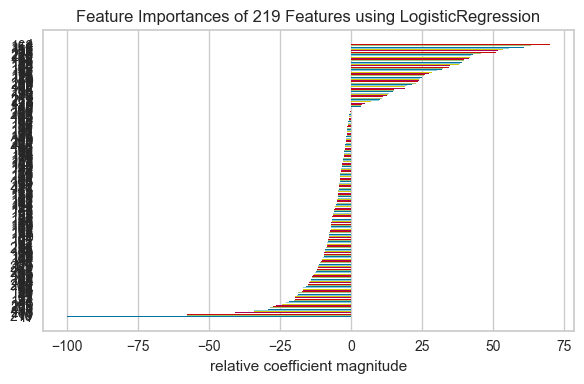

In [55]:
fig, ax = plt.subplots (figsize=(6,4))
fi_viz = FeatureImportances(lr)
fi_viz.fit(test_x_10,test_y_10)
fi_viz.poof()
fig.savefig("LR_Feature_Importance.png")

In [80]:
test_x_top_5_features = np.sort(flippers_train_processed)[:10,-5:]
#test_y_top_5_features = test_y[:10,-5:]

In [82]:
test_x_top_5_features.shape, test_y_10.shape

((10, 5), (10, 1))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


IndexError: index 11 is out of bounds for axis 0 with size 5

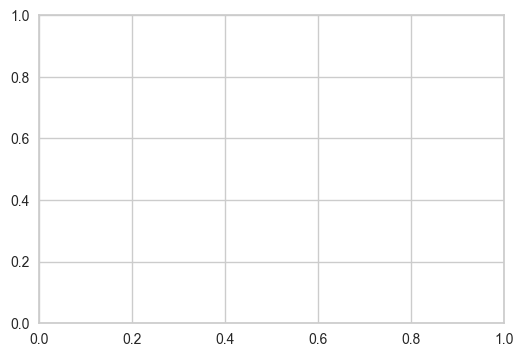

In [83]:
fig, ax = plt.subplots (figsize=(6,4))
fi_viz = FeatureImportances(lr)
fi_viz.fit(test_x_top_5_features,test_y_10)
fi_viz.poof()
fig.savefig("LR_Feature_Importance.png")